# A TensorFlow MNIST handwritten digit recogniser

### The following Notebook uses TensorFlow to create a multilayer neural network capable of recongising handwritten digits from the MNIST dataset.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

### The following trained classifier has a prediction accuracy of approximately 98%.

In [57]:
# Initialise placeholder for training data, 784 elemements to store 28*28 pixel flattened images
X = tf.placeholder(tf.float32, [None, 784])

K = 200
L = 100
M = 60
N = 30
# Iniitalise variable for storing weights
W1 = tf.Variable(tf.truncated_normal([784, K], stddev=0.1)) #784 x 200
b1 = tf.Variable(tf.zeros([K]))

W2 = tf.Variable(tf.truncated_normal([K, L], stddev=0.1)) # 200 x 100
b2 = tf.Variable(tf.zeros([L]))

W3 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) # 100 x 60
b3 = tf.Variable(tf.zeros([M]))

W4 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1)) # 60 x 30
b4 = tf.Variable(tf.zeros([N]))

W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1)) # 30 x 10
b5 = tf.Variable(tf.zeros([10]))

init = tf.global_variables_initializer()

X = tf.reshape(X, [-1, 784])

Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + b4) # using relu for all layers resulted in NaN errors
Y = tf.nn.softmax(tf.matmul(Y4, W5) + b5)
Y_ = tf.placeholder(tf.float32, [None, 10])

# Loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# % correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Using gradient descent with step size 0.003 with cross entropy loss funciton
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

# Start TensorFlow session and initalise
sess = tf.Session()
sess.run(init)
listA1 = []
listA2 = []
for i in range(10000):
    # Get the next set of 100 images to use as training data
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}
    
    # Run training on train data
    sess.run(train_step, feed_dict=train_data)
    
    # Get accuracy and cross_entropy
    a1,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    listA1.append(a1)
    if(i%1000 == 0):
        test_data = {X:mnist.test.images, Y_:mnist.test.labels}
        a2,c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
        listA2.append(a2)
        print("i: {:d} a: {:f} c: {:f}".format(i,a2,c))
    else:
        listA2.append(a2)

i: 0 a: 0.102400 c: 23168.023438
i: 1000 a: 0.955000 c: 1581.921265
i: 2000 a: 0.972400 c: 973.040100
i: 3000 a: 0.972300 c: 930.290527
i: 4000 a: 0.971700 c: 976.967041
i: 5000 a: 0.978600 c: 787.969666
i: 6000 a: 0.978600 c: 820.877625
i: 7000 a: 0.976700 c: 886.465454
i: 8000 a: 0.981300 c: 767.870117
i: 9000 a: 0.981700 c: 751.333374


## Plot of training and test accuracies. 

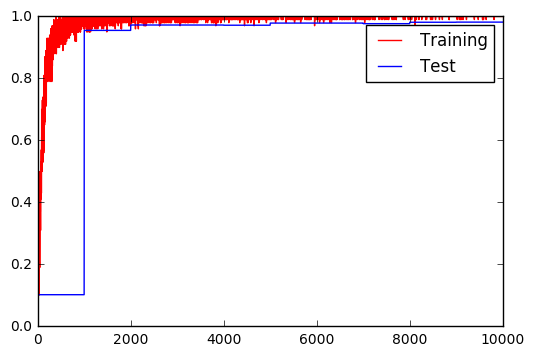

In [58]:
import matplotlib.pyplot as plt
plt.plot(listA1, "r-", label="Training")
plt.plot(listA2, "b-", label="Test")
plt.legend()
plt.show()

## The following code reads in one image from the MNIST dataset and predicts the value present using the trained classifier.

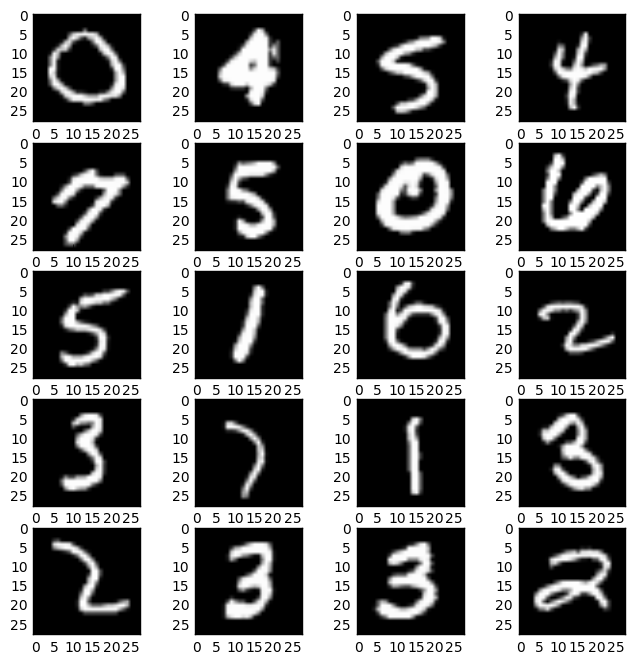

[[0, 4, 5, 4], [7, 5, 0, 6], [5, 1, 6, 2], [3, 7, 1, 3], [2, 3, 3, 2]]


In [65]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
results = []
row = []
for i in range(1, columns*rows +1):
    batch = mnist.test.next_batch(1)
    plotData = batch[0]
    plotData = plotData.reshape(28, 28)
    plt.gray() # use this line if you don't want to see it in color
    fig.add_subplot(rows, columns, i)
    plt.imshow(plotData)
    

    answer = sess.run(Y, feed_dict={X: batch[0]})
    x  = sess.run(tf.argmax(answer, 1))
    
    row.append(x[0])
    if(i % 4 == 0):
        results.append(row)
        row = []

plt.show()

print(results)